In [1]:
cd /data/store01/data_dirs/students/ucfafyi/Sentinel

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [2]:
import sys
sys.path.insert(0, 'python')
from fastRWpkl import *
from glob import glob
import pylab as plt
%matplotlib inline
from Dload_Finder import *
from applied import *
from scipy.stats import linregress, gaussian_kde
from nicer_plot import *
from matplotlib import colors, cm, gridspec
from geo_trans import *
from Py6S import *
import pandas as pd
from smoothn import *

In [3]:
general_psf = [[  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682]]
general_psf = np.array(general_psf)

In [5]:
dates = get_closet(13.77694,8.99, 2016, p=0)

In [6]:
names = [[j, dates[1][i]] for i,j in enumerate(dates[0]) if (int(j.split('/')[-4])==4)&(int(j.split('/')[-3])==3)][0]

In [6]:
fpath, mfile = names

In [7]:
fpath, mfile

('/home/ucfafyi/DATA/Sentinel/s_data/32/P/MA/2016/4/3/0/',
 array([ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016097.h18v07.005.2016116210702.hdf',
        '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016097.h18v07.005.2016116210702.hdf'], 
       dtype='|S80'))

In [8]:
fpath = '/home/ucfafyi/DATA/Sentinel/s_data/32/P/MA/2016/4/3/0/'
mfile = [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016097.h18v07.005.2016116210702.hdf',
        '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016097.h18v07.005.2016116210702.hdf']
lat, lon, year =13.77694,8.99, 2016

In [9]:
to_regs = applied(lat, lon, fpath, mfile, general_psf)
to_reg = [[i[3],i[4]] for i in to_regs]


Here is the cloud probability calculation!

/home/ucfafyi/DATA/Sentinel/s_data/32/P/MA/2016/4/3/0/ (2, 3, 4, 8, 11, 12, 13)
7%
14%
21%
29%
36%
43%
50%
57%
64%
71%
79%
86%
93%
99%
Done!!!
DOY:  97 
Location:  32PMA
Cloud proportion:  8.37007840054e-05


/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


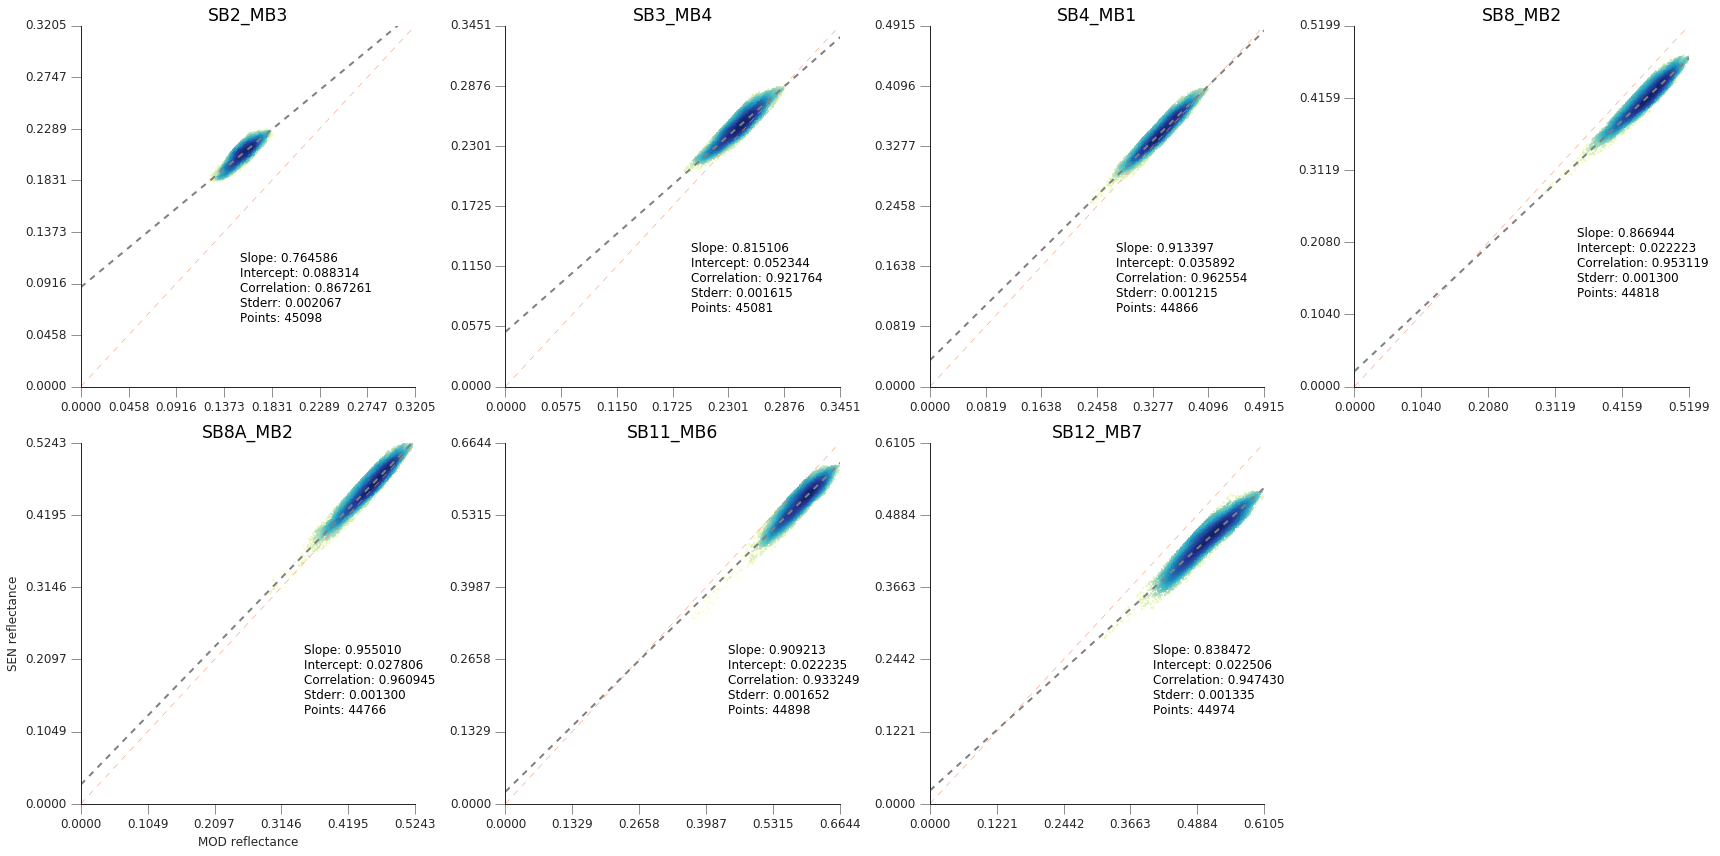

In [10]:
from matplotlib import colors
plot_config()
fig = plt.figure()
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(24,12))
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8A_MB2,SB11_MB6,SB12_MB7').split(',')
cmap = cm.get_cmap('YlGnBu')
psfsolve = []
for i in range(7):
    ax = fig.add_subplot(gs[i])
    s,m = to_reg[i]
    
    mval = np.nanmax([s,m])
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='',norm=colors.LogNorm(vmin=z.min(), vmax=z.max()*1.2), cmap = cmap)
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    slope,inter, rval, pval, std = r = scipy.stats.linregress(m,s)
    ax.set_title('%s'%names[i])
    ax.text(mval*(4./6.),mval*(1.5/6.),'Slope: %02f \nIntercept: %02f \nCorrelation: %02f \nStderr: %02f \nPoints: %s'%(slope,inter, rval, std, len(m)), 
        )
    pretty_axes(ax)
    ax.set_xlim(0,mval)
    ax.set_ylim(0,mval)
    ax.set_yticks(np.arange(0,mval+0.1,mval/5.))
    ax.set_xticks(np.arange(0,mval+0.1,mval/5.))
    if i==4:
        ax.set_xlabel ( "MOD reflectance")
        ax.set_ylabel ( "SEN reflectance")
    psfsolve.append([slope,inter])
plt.tight_layout()

In [11]:
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
mg

'32PMA98922306'

In [12]:
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
imgx, imgy

(7693, 9892)

In [13]:
lx = (imgx/1000)*1000; ux = (imgx/1000+1)*1000
ly = (imgy/1000)*1000; uy = (imgy/1000+1)*1000
lx, ux, ly, uy

(7000, 8000, 9000, 10000)

In [14]:
indx, indy = to_regs[0][1], to_regs[0][2]
ms = (indx>lx)&(indx<ux)&(indy>ly)&(indy<uy)
aoi = np.where(ms)

In [15]:
atmos = readmeteo(fpath+'auxiliary/ECMWFT')
ozone = np.mean(atmos['TCO3']*4.6728972)
water = np.mean(atmos['TCWV']/10.)
print water, ozone
mete = readxml(fpath+'metadata.xml')
sz = mete['mSz']
sa = mete['mSa']
vz = mete['mVz']
va = mete['mVa']

1.65654067522 0.0252146601794


In [16]:
def atm(p,sref = None, sen_rsr = None, band = None, angles = None):
    #print p
    aot550, water, ozone = p
    sa,sz, va, vz = angles
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []    
    s = SixS(path)
    s.altitudes.set_target_sea_level()
    s.altitudes.set_sensor_satellite_level()
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.solar_a = sa
    s.geometry.solar_z = sz
    s.geometry.view_a = va[band]
    s.geometry.view_z = vz[band]
    srsp = sen_rsr[band]
    wv, we = swl[srsp!=0]/1000.,srsp[srsp!=0]
    mi,ma = round(wv.min(),3),round(wv.max(),3)
    f = interpolate.interp1d(wv,we)
    xnew = np.arange(mi,ma,0.0025)
    ynew = f(xnew)
    s.wavelength = Wavelength(xnew[0],xnew[-1],ynew)
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(sref)
    s.run()
    return s.outputs.atmos_corrected_reflectance_lambertian

def cost(p, args = None):
    if any(p<0):
        return 10000
    else:
        sref, mref, sen_rsr , band , angles = args
        ss = atm(p, sref = sref, sen_rsr = sen_rsr, band = band, angles = angles)
        cost = abs(mref-ss)
        return cost

In [17]:
sen_rsp = pd.ExcelFile('sp_rep/Sentbands.xlsx')
swl = np.array(sen_rsp.parse('Spectral Responses')['SR_WL'])
cname= 'SR_AV_B2', 'SR_AV_B3', 'SR_AV_B4', 'SR_AV_B8', 'SR_AV_B8A', 'SR_AV_B11', 'SR_AV_B12'
sen_rsr = [np.array(sen_rsp.parse('Spectral Responses')[i]) for i in cname]

In [18]:
p = np.array([0.2,1.89847212426, 0.0263747354372])

solved = []
def opt(i):
    args = to_regs[0][3][aoi[0][i]], to_regs[0][4][aoi[0][i]], sen_rsr,0, [sa,sz, va, vz]
    psolve = optimize.fmin(cost,p, full_output=1, args=(args,))
    print psolve
    return [to_regs[0][1][aoi[0][i]], to_regs[0][2][aoi[0][i]],psolve]

In [ ]:
pool = multiprocessing.Pool(processes = 16)
retval = pool.map(opt, range(len(aoi[0])))
pool.close()
pool.join()